In [1]:
import os
import math
import pickle
import numpy as np
import pandas as pd
import datetime as dt
import plotly.express as px
import matplotlib.pyplot as plt
import plotly.graph_objects as go

from itertools import cycle
from sklearn.utils import shuffle
from plotly.subplots import make_subplots
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, explained_variance_score, \
                            r2_score, mean_poisson_deviance, mean_gamma_deviance, accuracy_score 

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM

# Without Features

In [2]:
df_btc = pd.read_csv('BTC.csv')
df_btc['Date'] = pd.to_datetime(df_btc['Date'])
df_btc = df_btc[['Date','Close']]
df_btc = df_btc[df_btc['Date'] > '2018-01-01']
df_btc = df_btc.dropna()
btc_stock = df_btc.copy()
btc_stock

,Date,Close
1203,2018-01-02,14982.099609
1204,2018-01-03,15201.000000
1205,2018-01-04,15599.200195
1206,2018-01-05,17429.500000
1207,2018-01-06,17527.000000
...,...,...
2978,2022-11-12,16799.185547
2979,2022-11-13,16353.365234
2980,2022-11-14,16618.199219
2981,2022-11-15,16884.613281


In [3]:
del df_btc['Date']
scaler = MinMaxScaler(feature_range=(0,1))
df_btc = scaler.fit_transform(np.array(df_btc).reshape(-1,1))

In [4]:
# split dataset into train and test split
training_size = int(len(df_btc)*0.8)
test_size = len(df_btc) - training_size

train_data, test_data = df_btc[0:training_size,:], df_btc[training_size:len(df_btc),:1]

In [5]:
def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return np.array(dataX), np.array(dataY)

In [6]:
time_step = 15
X_train_wof, y_train_wof = create_dataset(train_data, time_step)
X_test_wof, y_test_wof = create_dataset(test_data, time_step)

print("X_train: ", X_train_wof.shape)
print("y_train: ", y_train_wof.shape)
print("X_test: ", X_test_wof.shape)

X_train:  (1408, 15)
y_train:  (1408,)
X_test:  (340, 15)


In [7]:
X_train_wof = X_train_wof.reshape(X_train_wof.shape[0],X_train_wof.shape[1] , 1)
X_test_wof = X_test_wof.reshape(X_test_wof.shape[0],X_test_wof.shape[1] , 1)

print("X_train: ", X_train_wof.shape)
print("X_test: ", X_test_wof.shape)

X_train:  (1408, 15, 1)
X_test:  (340, 15, 1)


In [8]:
model_wof=Sequential()
model_wof.add(LSTM(10,input_shape=(None,1),activation="relu"))
model_wof.add(Dense(1))
model_wof.compile(loss="mean_squared_error",optimizer="sgd")
history = model_wof.fit(
                    X_train_wof,
                    y_train_wof,
                    validation_data=(X_test_wof,y_test_wof),
                    epochs=200,
                    batch_size=32,
                    verbose=1
                    )
model_wof.evaluate(X_test_wof, y_test_wof)

Epoch 1/200
44/44 [==============================] - 1s 6ms/step - loss: 0.0229 - val_loss: 0.0097
Epoch 2/200
44/44 [==============================] - 0s 3ms/step - loss: 0.0105 - val_loss: 0.0041
Epoch 3/200
44/44 [==============================] - 0s 3ms/step - loss: 0.0056 - val_loss: 0.0023
Epoch 4/200
44/44 [==============================] - 0s 3ms/step - loss: 0.0030 - val_loss: 0.0013
Epoch 5/200
44/44 [==============================] - 0s 2ms/step - loss: 0.0017 - val_loss: 0.0010
Epoch 6/200
44/44 [==============================] - 0s 3ms/step - loss: 0.0012 - val_loss: 9.2135e-04
Epoch 7/200
44/44 [==============================] - 0s 3ms/step - loss: 0.0010 - val_loss: 9.2197e-04
Epoch 8/200
44/44 [==============================] - 0s 3ms/step - loss: 9.4478e-04 - val_loss: 9.3182e-04
Epoch 9/200
44/44 [==============================] - 0s 3ms/step - loss: 9.1840e-04 - val_loss: 9.4601e-04
Epoch 10/200
44/44 [==============================] - 0s 3ms/step - loss: 9.0720e-04 

44/44 [==============================] - 0s 3ms/step - loss: 8.1691e-04 - val_loss: 0.0010
Epoch 79/200
44/44 [==============================] - 0s 3ms/step - loss: 8.1731e-04 - val_loss: 9.8561e-04
Epoch 80/200
44/44 [==============================] - 0s 3ms/step - loss: 8.1502e-04 - val_loss: 9.6183e-04
Epoch 81/200
44/44 [==============================] - 0s 3ms/step - loss: 8.1608e-04 - val_loss: 9.9243e-04
Epoch 82/200
44/44 [==============================] - 0s 3ms/step - loss: 8.1449e-04 - val_loss: 9.8555e-04
Epoch 83/200
44/44 [==============================] - 0s 3ms/step - loss: 8.1508e-04 - val_loss: 0.0010
Epoch 84/200
44/44 [==============================] - 0s 3ms/step - loss: 8.1360e-04 - val_loss: 9.8672e-04
Epoch 85/200
44/44 [==============================] - 0s 3ms/step - loss: 8.1171e-04 - val_loss: 9.7343e-04
Epoch 86/200
44/44 [==============================] - 0s 3ms/step - loss: 8.1125e-04 - val_loss: 0.0010
Epoch 87/200
44/44 [==============================] -

44/44 [==============================] - 0s 3ms/step - loss: 7.6463e-04 - val_loss: 0.0010
Epoch 155/200
44/44 [==============================] - 0s 3ms/step - loss: 7.6338e-04 - val_loss: 9.7047e-04
Epoch 156/200
44/44 [==============================] - 0s 3ms/step - loss: 7.6397e-04 - val_loss: 9.6724e-04
Epoch 157/200
44/44 [==============================] - 0s 3ms/step - loss: 7.6473e-04 - val_loss: 0.0010
Epoch 158/200
44/44 [==============================] - 0s 3ms/step - loss: 7.6067e-04 - val_loss: 9.5284e-04
Epoch 159/200
44/44 [==============================] - 0s 3ms/step - loss: 7.6043e-04 - val_loss: 9.5363e-04
Epoch 160/200
44/44 [==============================] - 0s 3ms/step - loss: 7.5800e-04 - val_loss: 9.9387e-04
Epoch 161/200
44/44 [==============================] - 0s 3ms/step - loss: 7.5942e-04 - val_loss: 0.0010
Epoch 162/200
44/44 [==============================] - 0s 3ms/step - loss: 7.6080e-04 - val_loss: 0.0010
Epoch 163/200
44/44 [============================

0.0010326491901651025

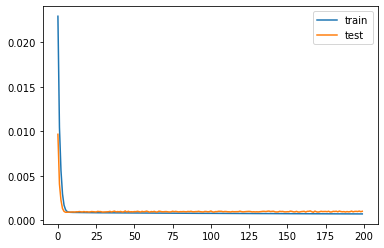

In [9]:
# plot history
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

# With Features

In [10]:
df_btc = pd.read_csv('BTC.csv')
df_btc['Date'] = pd.to_datetime(df_btc['Date'])
df_btc = df_btc[['Date','Open','High','Low','Close']]
df_btc = df_btc[df_btc['Date'] > '2018-01-01']
df_btc = df_btc.dropna()
btc_stock = df_btc.copy()
btc_stock

,Date,Open,High,Low,Close
1203,2018-01-02,13625.000000,15444.599609,13163.599609,14982.099609
1204,2018-01-03,14978.200195,15572.799805,14844.500000,15201.000000
1205,2018-01-04,15270.700195,15739.700195,14522.200195,15599.200195
1206,2018-01-05,15477.200195,17705.199219,15202.799805,17429.500000
1207,2018-01-06,17462.099609,17712.400391,16764.599609,17527.000000
...,...,...,...,...,...
2978,2022-11-12,17036.875000,17066.675781,16651.775391,16799.185547
2979,2022-11-13,16799.722656,16920.765625,16320.634766,16353.365234
2980,2022-11-14,16352.028320,17109.324219,15872.941406,16618.199219
2981,2022-11-15,16617.484375,17051.962891,16542.550781,16884.613281


In [11]:
del df_btc['Date']
scaler = MinMaxScaler(feature_range=(0,1))
df_btc = scaler.fit_transform(df_btc)
print(df_btc.shape)
with open('scaler BTC.pkl', 'wb') as f:
    pickle.dump(scaler, f)

(1780, 4)


In [12]:
# split dataset into train and test split
training_size = int(len(df_btc)*0.8)
test_size = len(df_btc) - training_size

train_data, test_data = df_btc[0:training_size,:], df_btc[training_size:len(df_btc),]

In [13]:
def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), :]
        dataX.append(a)
        dataY.append(dataset[i + time_step,-1])
    return np.array(dataX), np.array(dataY)

In [14]:
time_step = 15
X_train_wf, y_train_wf = create_dataset(train_data, time_step)
X_test_wf, y_test_wf = create_dataset(test_data, time_step)

print("X_train: ", X_train_wf.shape)
print("y_train: ", y_train_wf.shape)
print("X_test: ", X_test_wf.shape)
print("y_test: ", y_test_wf.shape)

X_train:  (1408, 15, 4)
y_train:  (1408,)
X_test:  (340, 15, 4)
y_test:  (340,)


In [15]:
model_wf=Sequential()
model_wf.add(LSTM(10,input_shape=(None,4),activation="relu"))
model_wf.add(Dense(1))
model_wf.compile(loss="mean_squared_error",optimizer="adam")
history = model_wf.fit(
                    X_train_wf,
                    y_train_wf,
                    validation_data=(X_test_wf,y_test_wf),
                    epochs=200,
                    batch_size=32,
                    verbose=1
                    )
model_wf.evaluate(X_test_wf, y_test_wf)

Epoch 1/200
44/44 [==============================] - 1s 8ms/step - loss: 0.0861 - val_loss: 0.0058
Epoch 2/200
44/44 [==============================] - 0s 3ms/step - loss: 0.0035 - val_loss: 0.0011
Epoch 3/200
44/44 [==============================] - 0s 3ms/step - loss: 0.0013 - val_loss: 0.0013
Epoch 4/200
44/44 [==============================] - 0s 4ms/step - loss: 0.0011 - val_loss: 0.0014
Epoch 5/200
44/44 [==============================] - 0s 4ms/step - loss: 9.6178e-04 - val_loss: 0.0010
Epoch 6/200
44/44 [==============================] - 0s 4ms/step - loss: 8.8518e-04 - val_loss: 9.4571e-04
Epoch 7/200
44/44 [==============================] - 0s 4ms/step - loss: 7.8120e-04 - val_loss: 9.7370e-04
Epoch 8/200
44/44 [==============================] - 0s 4ms/step - loss: 7.1526e-04 - val_loss: 9.4839e-04
Epoch 9/200
44/44 [==============================] - 0s 4ms/step - loss: 6.9785e-04 - val_loss: 9.2475e-04
Epoch 10/200
44/44 [==============================] - 0s 4ms/step - loss:

Epoch 78/200
44/44 [==============================] - 0s 4ms/step - loss: 3.6924e-04 - val_loss: 7.1627e-04
Epoch 79/200
44/44 [==============================] - 0s 4ms/step - loss: 3.6701e-04 - val_loss: 5.6916e-04
Epoch 80/200
44/44 [==============================] - 0s 4ms/step - loss: 3.5863e-04 - val_loss: 5.9119e-04
Epoch 81/200
44/44 [==============================] - 0s 4ms/step - loss: 3.5441e-04 - val_loss: 7.0772e-04
Epoch 82/200
44/44 [==============================] - 0s 4ms/step - loss: 3.6825e-04 - val_loss: 7.1238e-04
Epoch 83/200
44/44 [==============================] - 0s 4ms/step - loss: 3.7470e-04 - val_loss: 6.1618e-04
Epoch 84/200
44/44 [==============================] - 0s 4ms/step - loss: 3.4619e-04 - val_loss: 5.6169e-04
Epoch 85/200
44/44 [==============================] - 0s 4ms/step - loss: 3.5328e-04 - val_loss: 5.2644e-04
Epoch 86/200
44/44 [==============================] - 0s 5ms/step - loss: 3.6363e-04 - val_loss: 6.6824e-04
Epoch 87/200
44/44 [========

44/44 [==============================] - 0s 4ms/step - loss: 2.8172e-04 - val_loss: 5.1634e-04
Epoch 154/200
44/44 [==============================] - 0s 4ms/step - loss: 2.7275e-04 - val_loss: 5.4042e-04
Epoch 155/200
44/44 [==============================] - 0s 4ms/step - loss: 2.9191e-04 - val_loss: 8.0354e-04
Epoch 156/200
44/44 [==============================] - 0s 4ms/step - loss: 2.8823e-04 - val_loss: 3.9279e-04
Epoch 157/200
44/44 [==============================] - 0s 4ms/step - loss: 2.9231e-04 - val_loss: 3.8216e-04
Epoch 158/200
44/44 [==============================] - 0s 4ms/step - loss: 2.8511e-04 - val_loss: 3.7674e-04
Epoch 159/200
44/44 [==============================] - 0s 4ms/step - loss: 2.8330e-04 - val_loss: 4.4214e-04
Epoch 160/200
44/44 [==============================] - 0s 4ms/step - loss: 2.9378e-04 - val_loss: 5.0193e-04
Epoch 161/200
44/44 [==============================] - 0s 4ms/step - loss: 2.7423e-04 - val_loss: 4.0401e-04
Epoch 162/200
44/44 [============

0.0005962062859907746

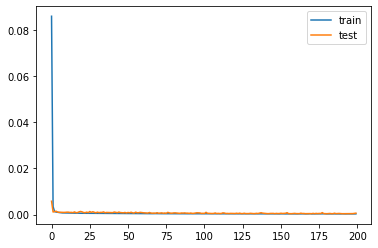

In [16]:
# plot history
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

In [17]:
model_wf.save('model_wf BTC.h5')
model_wof.save('model_wof BTC.h5')